In [1]:
%matplotlib inline

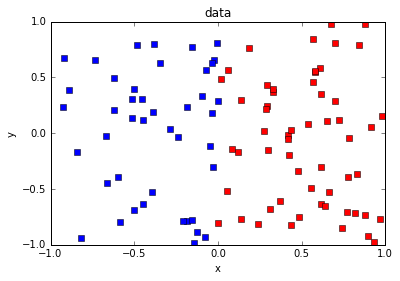

In [3]:
import numpy as np
from scipy.special import expit #fast sigmoid
from matplotlib import pyplot as plt

#Generate random points
data_all = []
for i in xrange(0, 100):
    rand_x = np.random.random()*2. - 1.
    rand_y = np.random.random()*2. - 1.
    label = 1. if rand_x > 0 else -1.
    data_all.append((rand_x, rand_y, label))

#define hypothesis function
def hypothesis(data, theta):
    #print 'Running hypothesis on:', data, 'theta:', theta
    out = 0.0
    return expit(theta[0] + np.sum(np.array(data[:-1]) * theta[1:])) #sigmoid( ti + datai * ti + ... + datan * tn )

#define cost function
def cost(data, theta):
    c = 0.
    for d in data:
        #print 'Testing cost of data point:', d
        c += hypothesis(d, theta) - d[2]
    return c / len(data)

#plot
fig, axes = plt.subplots()

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('data');

for d in data_all:
    #plot
    axes.plot(d[0], d[1], 'rs' if d[2] > 0 else 'bs')

#Try some random parameters to find optimal solution for simple linear regression
bestTheta = [0,0,0]
lowestCost = 100000.
for test in xrange(100):
        theta_test = [np.random.random()*2.-1., np.random.random()*2.-1., np.random.random()*2.-1.]
        c = cost(data_all, theta_test)
        if (c < lowestCost):
            lowestCost = c
            bestTheta = theta_test
            